In [6]:
#from shift_stack_moons.shift_stack_moons import shift_and_stack
from shift_stack_moons import shift_and_stack
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os
from astroquery.jplhorizons import Horizons

In [7]:
# find filenames
data_dir = '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/'
data_files = os.listdir(data_dir)
instrument = 'nirc2'
stem = 'urh'
obscode = '568' #Keck JPL Horizons obs code
code = 'Puck'
date = '2019-11-04'
tstart = date+' 00:00'
tend = date+' 23:59'
perturbation_experiment = False
outfname = f"{stem}_{code}_{date}.fits"
fnames = [data_dir+s for s in data_files if s.startswith(stem)]
#print(fnames)

In [8]:
## get ephemeris from Horizons. quantity 6 is the satellite relative position to parent in arcsec
horizons_obj = Horizons(
    id=code,
    location=obscode,
    epochs={"start": tstart, "stop": tend, "step": "1m"},
)
ephem = horizons_obj.ephemerides(quantities=6) #.to_pandas()
#ephem = ephem.set_index(pd.DatetimeIndex(ephem["datetime_str"]))

In [9]:
fits_out = shift_and_stack(fnames, ephem, instrument=instrument, difference=True, edge_detect=False, diagnostic_plots=False)
fits_out.writeto(outfname, overwrite=True)

Processing file 1 out of 56
Processing file 2 out of 56
Processing file 3 out of 56
Processing file 4 out of 56
Processing file 5 out of 56
Processing file 6 out of 56
Processing file 7 out of 56
Processing file 8 out of 56
Processing file 9 out of 56
Processing file 10 out of 56
Processing file 11 out of 56
Processing file 12 out of 56
Processing file 13 out of 56
Processing file 14 out of 56
Processing file 15 out of 56
Processing file 16 out of 56
Processing file 17 out of 56
Processing file 18 out of 56
Processing file 19 out of 56
Processing file 20 out of 56
Processing file 21 out of 56
Processing file 22 out of 56
Processing file 23 out of 56
Processing file 24 out of 56
Processing file 25 out of 56
Processing file 26 out of 56
Processing file 27 out of 56
Processing file 28 out of 56
Processing file 29 out of 56
Processing file 30 out of 56
Processing file 31 out of 56
Processing file 32 out of 56
Processing file 33 out of 56
Processing file 34 out of 56
Processing file 35 out 

Creates file urh_Puck_2019-11-04.fits

Total integration time in stack: 6720.0, which equals 56 frames * 120s per frame


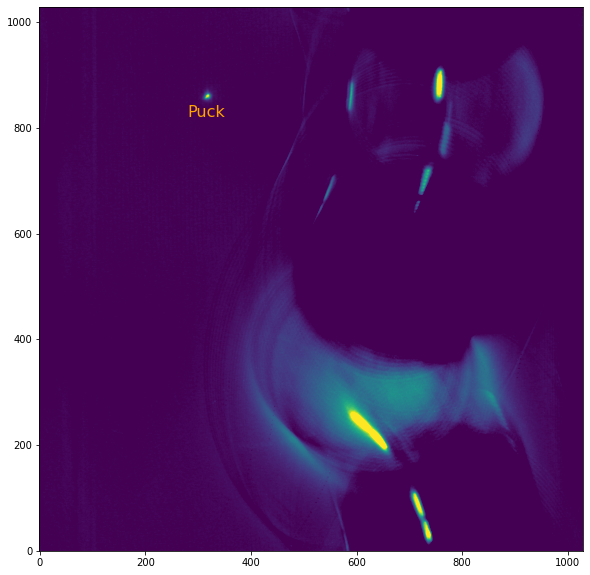

In [14]:
# Visualize the output
hdul = fits.open('urh_Puck_2019-11-04.fits')
hdr = hdul[0].header
stacked_data = hdul[0].data
print(f'Total integration time in stack: {hdr["ITIME"]}, which equals 56 frames * 120s per frame')

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(stacked_data, origin='lower', vmin=0, vmax = stacked_data.max()/2)
ax.text(280, 820, 'Puck', color='orange', fontsize=16)
plt.show()